In [ ]:
"""
Created on 2019/02/19

Ref: https://morvanzhou.github.io/tutorials/machine-learning/torch/3-06-optimizer/
"""

# Import

In [1]:
import torch
import torch.utils.data as Data
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Dataset

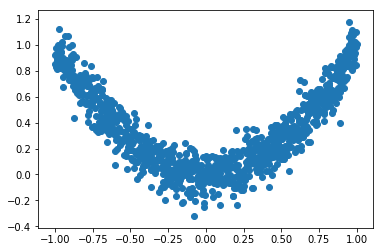

In [3]:
torch.manual_seed(1)    # reproducible

LR = 0.01
BATCH_SIZE = 32
EPOCH = 12

# fake dataset
x = torch.unsqueeze(torch.linspace(-1, 1, 1000), dim=1)
y = x.pow(2) + 0.1*torch.normal(torch.zeros(*x.size()))

# plot dataset
plt.scatter(x.numpy(), y.numpy())
plt.show()

# 使用上节内容提到的 data loader
torch_dataset = Data.TensorDataset(x, y)  # 都還是tensor -> 訓練時要轉成Variable
loader = Data.DataLoader(dataset=torch_dataset, 
                         batch_size=BATCH_SIZE, 
                         shuffle=True, 
                         num_workers=2)

# Create Nets

In [4]:
# 默认的 network 形式
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(1, 20)   # hidden layer
        self.predict = torch.nn.Linear(20, 1)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

# 为每个优化器创建一个 net
net_SGD         = Net()
net_Momentum    = Net()
net_RMSprop     = Net()
net_Adam        = Net()
nets = [net_SGD, net_Momentum, net_RMSprop, net_Adam]

# Optimizers

In [6]:
# different optimizers
opt_SGD         = torch.optim.SGD(net_SGD.parameters(), lr=LR)
opt_Momentum    = torch.optim.SGD(net_Momentum.parameters(), lr=LR, momentum=0.8)
opt_RMSprop     = torch.optim.RMSprop(net_RMSprop.parameters(), lr=LR, alpha=0.9)
opt_Adam        = torch.optim.Adam(net_Adam.parameters(), lr=LR, betas=(0.5, 0.99))
optimizers = [opt_SGD, opt_Momentum, opt_RMSprop, opt_Adam]

loss_func = torch.nn.MSELoss()
losses_his = [[], [], [], []]   # 记录 training 时不同神经网络的 loss

# Start Training

In [7]:
for epoch in range(EPOCH):
    print('Epoch: ', epoch)
    for step, (b_x, b_y) in enumerate(loader):
        # https://mp.weixin.qq.com/s?__biz=MzI0ODcxODk5OA==&mid=2247494701&idx=2&sn=ea8411d66038f172a2f553770adccbec&chksm=e99edfd4dee956c23c47c7bb97a31ee816eb3a0404466c1a57c12948d807c975053e38b18097&scene=21#wechat_redirect
        # Variable 與 Tensor 類合併
        # 对每个优化器, 优化属于他的神经网络
        for net, opt, l_his in zip(nets, optimizers, losses_his):
            output = net(b_x)              # get output for every net
            loss = loss_func(output, b_y)  # compute loss for every net
            opt.zero_grad()                # clear gradients for next train
            loss.backward()                # backpropagation, compute gradients
            opt.step()                     # apply gradients
            l_his.append(loss.data.numpy())     # loss recoder

Epoch:  0
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11


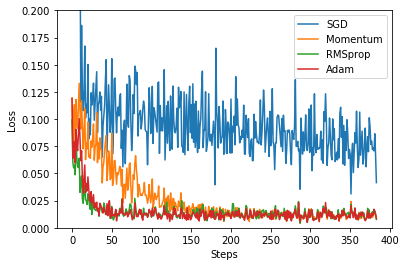

In [12]:
labels = ["SGD", "Momentum", "RMSprop", "Adam"]
for i, h in enumerate(losses_his):
    plt.plot(h, label=labels[i])
plt.legend(loc='best')
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.ylim((0, 0.2))
plt.show()